<a href="https://colab.research.google.com/github/RajeshworM/Machine_Learning/blob/main/EnsembleModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ensemble Model**

1. Models in the Ensemble:
Machine Learning (ML)/Artificial Intelligence (AI): Predict crop yield or environmental factors using regression models like Random Forest or Neural Networks.
Crop Simulation Model: These simulate crop growth and yield based on input parameters (e.g., APSIM, DSSAT). For simplicity, we can mock these outputs.
Semi-Physical Model: Combines physics-based and empirical data.
Econometric Model: Uses statistical techniques to predict outcomes based on economic indicators.
2. Ensemble Strategy:
Weighted Averaging: Assign weights to each model’s output.
Stacking: Train a meta-model that combines predictions from all base models.
3. Step-by-Step Implementation:
Here’s a Python implementation:
4. Ensemble Model Analysis


**Step 1: Import Libraries**

In [2]:
#Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


**Step 2: Mocking Data and Outputs**
- We’ll create synthetic datasets to simulate different models’ predictions.

In [3]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = 3 * X[:, 0] + 2 * X[:, 1] + np.random.rand(100)  # Target variable

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Step 3: Define Individual Models**

In [4]:
# ML Model: Random Forest
ml_model = RandomForestRegressor(random_state=42)
ml_model.fit(X_train, y_train)
ml_predictions = ml_model.predict(X_test)

# Mock Crop Simulation Model
def crop_simulation_model(X):
    # A simple function to mimic crop simulation behavior
    return 2.5 * X[:, 0] + 1.5 * X[:, 1]

crop_sim_predictions = crop_simulation_model(X_test)

# Mock Semi-Physical Model
def semi_physical_model(X):
    return 3 * X[:, 2] + 2 * X[:, 3]

semi_physical_predictions = semi_physical_model(X_test)

# Econometric Model: Linear Regression
econometric_model = LinearRegression()
econometric_model.fit(X_train, y_train)
econ_predictions = econometric_model.predict(X_test)


**Step 4: Ensemble the Predictions**

In [5]:
# Combine predictions using Weighted Averaging
weights = [0.4, 0.3, 0.2, 0.1]  # Assigning weights to models
ensemble_predictions = (weights[0] * ml_predictions +
                        weights[1] * crop_sim_predictions +
                        weights[2] * semi_physical_predictions +
                        weights[3] * econ_predictions)

# Evaluate the Ensemble Model
mse = mean_squared_error(y_test, ensemble_predictions)
print(f"Mean Squared Error of Ensemble Model: {mse}")


Mean Squared Error of Ensemble Model: 0.46529937490711515


**Step 5: Use Stacking (Optional)**
- For stacking, train a meta-model that combines outputs of individual models.

In [6]:
# Stack predictions as new features
stacked_features = np.column_stack((ml_predictions, crop_sim_predictions,
                                     semi_physical_predictions, econ_predictions))

# Train a meta-model
meta_model = LinearRegression()
meta_model.fit(stacked_features, y_test)
final_predictions = meta_model.predict(stacked_features)

# Evaluate Stacked Ensemble
mse_stacked = mean_squared_error(y_test, final_predictions)
print(f"Mean Squared Error of Stacked Ensemble Model: {mse_stacked}")


Mean Squared Error of Stacked Ensemble Model: 0.05133103045490485


**Ensemble Model Analysis**

MSE for ML Model (Random Forest): 0.1477270573325381
MSE for Crop Simulation Model: 1.3838207094984651
MSE for Semi-Physical Model: 2.2924809770954835
MSE for Econometric Model: 0.1239283986588094
MSE for Ensemble Model (Weighted): 0.46529937490711515
MSE for Ensemble Model (Stacked): 0.05133103045490485


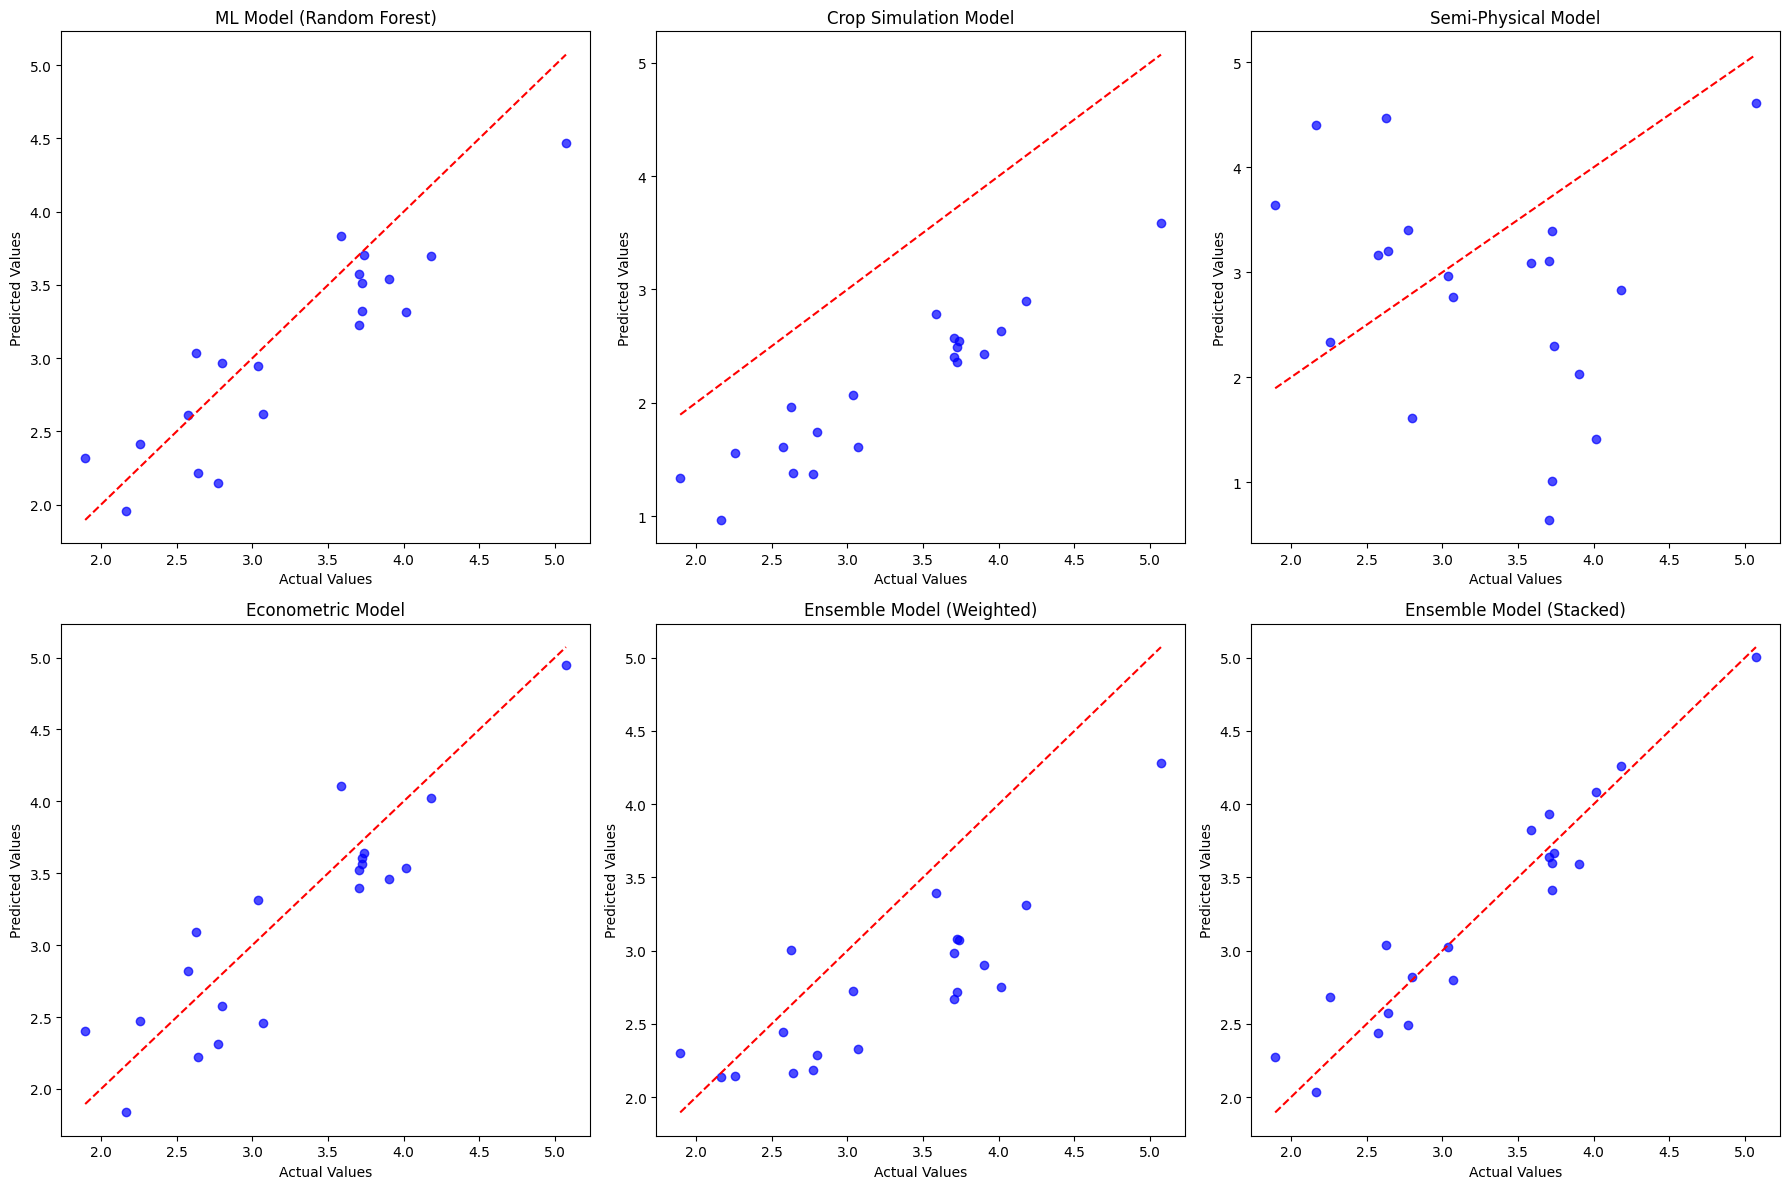


Conclusion:
The best model is 'Ensemble Model (Stacked)' with the lowest MSE: 0.05133103045490485.


In [7]:
import matplotlib.pyplot as plt

# Function to calculate and print MSE for each model
def evaluate_models(y_actual, predictions, model_name):
    mse = mean_squared_error(y_actual, predictions)
    print(f"MSE for {model_name}: {mse}")
    return mse

# Evaluate individual models and the ensemble model
ml_mse = evaluate_models(y_test, ml_predictions, "ML Model (Random Forest)")
crop_sim_mse = evaluate_models(y_test, crop_sim_predictions, "Crop Simulation Model")
semi_physical_mse = evaluate_models(y_test, semi_physical_predictions, "Semi-Physical Model")
econ_mse = evaluate_models(y_test, econ_predictions, "Econometric Model")
ensemble_mse = evaluate_models(y_test, ensemble_predictions, "Ensemble Model (Weighted)")
stacked_mse = evaluate_models(y_test, final_predictions, "Ensemble Model (Stacked)")

# Scatter plots to compare actual vs. predicted values
models = [
    (ml_predictions, "ML Model (Random Forest)"),
    (crop_sim_predictions, "Crop Simulation Model"),
    (semi_physical_predictions, "Semi-Physical Model"),
    (econ_predictions, "Econometric Model"),
    (ensemble_predictions, "Ensemble Model (Weighted)"),
    (final_predictions, "Ensemble Model (Stacked)")
]

plt.figure(figsize=(18, 12))

for i, (predictions, title) in enumerate(models, 1):
    plt.subplot(2, 3, i)
    plt.scatter(y_test, predictions, alpha=0.7, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
    plt.title(title)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()

# Conclusion: Compare MSE values and identify the best model
mse_values = {
    "ML Model (Random Forest)": ml_mse,
    "Crop Simulation Model": crop_sim_mse,
    "Semi-Physical Model": semi_physical_mse,
    "Econometric Model": econ_mse,
    "Ensemble Model (Weighted)": ensemble_mse,
    "Ensemble Model (Stacked)": stacked_mse
}

best_model = min(mse_values, key=mse_values.get)
print("\nConclusion:")
print(f"The best model is '{best_model}' with the lowest MSE: {mse_values[best_model]}.")
